In [2]:
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
import os

def load_data_from_folder(folder_path):
    all_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]
    df_list = [pd.read_csv(file) for file in all_files]
    return pd.concat(df_list, ignore_index=True)

# Load training and testing data
train_folder = 'final/train_db4'  
test_folder = 'final/test_db4'    
train_data = load_data_from_folder(train_folder)
test_data = load_data_from_folder(test_folder)

# Define input and output features
X_train = train_data[['vinp', 'pd', 'xpd', 'vdd', 'process', 'voltage', 'temperature']]
y_train = train_data['vinn']

X_test = test_data[['vinp', 'pd', 'xpd', 'vdd', 'process', 'voltage', 'temperature']]
y_test = test_data['vinn']

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the MLP model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  # Linear activation regression
])

# Compile the model with a regression-appropriate loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

c:\Users\admin\miniforge3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
model.save('mlp_regression_model.h5')


Epoch 1/5
52125/52125 ━━━━━━━━━━━━━━━━━━━━ 118s 2ms/step - loss: 0.0629 - mae: 0.1456 - val_loss: 0.0524 - val_mae: 0.1616
Epoch 2/5
52125/52125 ━━━━━━━━━━━━━━━━━━━━ 116s 2ms/step - loss: 0.0352 - mae: 0.0942 - val_loss: 0.0701 - val_mae: 0.1652
Epoch 3/5
52125/52125 ━━━━━━━━━━━━━━━━━━━━ 122s 2ms/step - loss: 0.0335 - mae: 0.0899 - val_loss: 0.0499 - val_mae: 0.1324
Epoch 4/5
52125/52125 ━━━━━━━━━━━━━━━━━━━━ 140s 3ms/step - loss: 0.0331 - mae: 0.0891 - val_loss: 0.0472 - val_mae: 0.1405
Epoch 5/5
52125/52125 ━━━━━━━━━━━━━━━━━━━━ 142s 3ms/step - loss: 0.0327 - mae: 0.0884 - val_loss: 0.0529 - val_mae: 0.1577


In [11]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Predict vinn values for the test data
y_pred = model.predict(X_test)

# If you want to compare predictions with actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(comparison.head())

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0220 - mae: 0.0700
Test Loss: 0.02772481180727482, Test MAE: 0.08972535282373428
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
         Actual  Predicted
0 -6.229080e-17   0.022320
1  1.386112e-03   0.022974
2  2.772223e-03   0.023628
3  4.158335e-03   0.024282
4  5.544446e-03   0.024936


In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Predict vinn values for the test data
y_pred = model.predict(X_test)

# Calculate Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


4713/4713 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
Mean Squared Error (MSE): 1.9171385761872826
Mean Absolute Error (MAE): 0.06706990516298152
Root Mean Squared Error (RMSE): 1.384607733687517
R-squared (R²): -7.656746899442624e-05


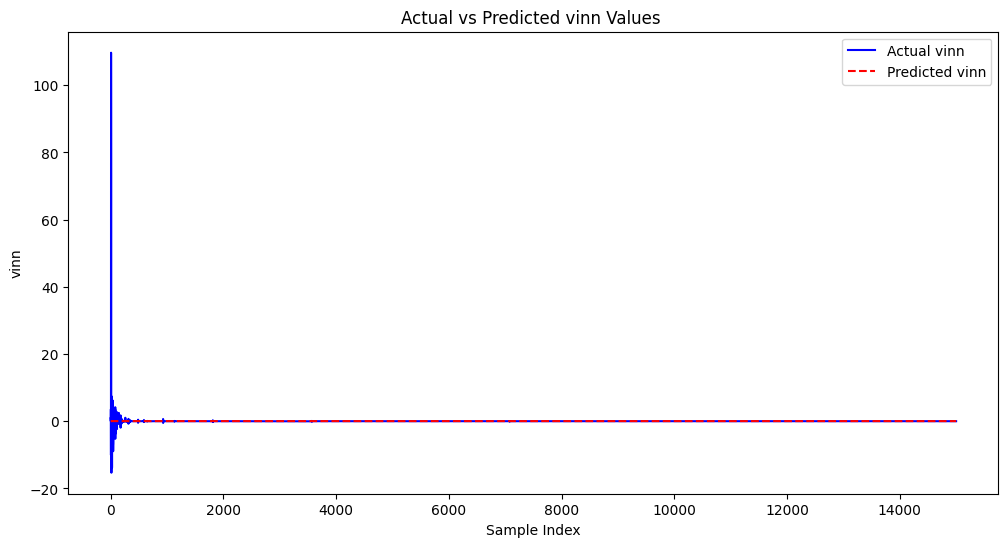

In [8]:
import matplotlib.pyplot as plt

# Convert y_test and y_pred to 1D arrays if they aren’t already
y_test_flat = y_test.to_numpy() if isinstance(y_test, pd.Series) else y_test
y_pred_flat = y_pred.flatten()  # Ensure y_pred is flattened

# Limit to the first 15,000 values
y_test_flat = y_test_flat[:15000]
y_pred_flat = y_pred_flat[:15000]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_flat, label="Actual vinn", color='blue', linewidth=1.5)
plt.plot(y_pred_flat, label="Predicted vinn", color='red', linestyle='--', linewidth=1.5)
plt.title("Actual vs Predicted vinn Values ")
plt.xlabel("Sample Index")
plt.ylabel("vinn")
plt.legend()
plt.show()

In [7]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Predict vinn values for the test data
y_pred = model.predict(X_test)

# If you want to compare predictions with actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(comparison.head())

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0208 - mae: 0.0686
Test Loss: 0.026286642998456955, Test MAE: 0.08921868354082108
4688/4688 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
         Actual  Predicted
0 -6.229080e-17   0.069235
1  1.386112e-03   0.070539
2  2.772223e-03   0.071843
3  4.158335e-03   0.073148
4  5.544446e-03   0.074452


In [13]:
print(X_test.shape)

(150000, 7)


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
testing = X_test[:15000]
checking = y_test [:15000]
print(testing.shape)
# Predict vinn values for the test data
y_pred = model.predict(testing)

# Calculate Evaluation Metrics
mse = mean_squared_error(checking, y_pred)
mae = mean_absolute_error(checking, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(checking, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


(15000, 7)
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Squared Error (MSE): 0.02972740249912929
Mean Absolute Error (MAE): 0.11221023880983497
Root Mean Squared Error (RMSE): 0.17241636378003478
R-squared (R²): 0.9343891129809445


In [23]:
reconstructed_coeffs = [y_pred[f'coeff_level_{i}'].dropna().values for i in range(len(coeffs))]
reconstructed_signal = pywt.waverec(reconstructed_coeffs, wavelet, mode=mode)

NameError: name 'coeffs' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Convert y_test and y_pred to 1D arrays if they aren’t already
y_test_flat = y_test.to_numpy() if isinstance(y_test, pd.Series) else y_test
y_pred_flat = y_pred.flatten()  # Ensure y_pred is flattened

# Limit to the first 15,000 values
y_test_flat = y_test_flat[:15000]
y_pred_flat = y_pred_flat[:15000]
df = pd.DataFrame({
    'Original': y_test_flat,
    'Predicted': y_pred_flat
})

# Save the DataFrame to a CSV file
df.to_csv('mlp_predictions.csv', index=False)
signal_power = np.mean(y_test_flat ** 2)
noise_power = np.mean((y_test_flat - y_pred_flat) ** 2)
snr = 10 * np.log10(signal_power / noise_power)

print(snr)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_flat, label="Actual vinn", color='red', linewidth=3)
plt.plot(y_pred_flat, label="Predicted vinn", color='blue', linewidth=1.5)
plt.title("Actual vs Predicted vinn Values ")
plt.xlabel("Sample Index")
plt.ylabel("vinn")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Predict on test data
predictions = model.predict(X_test)

# Save actual and predicted values into a CSV file
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': predictions.flatten()
})
results_df.to_csv('results.csv', index=False)
print("Actual and predicted values saved to 'results.csv'.")

# Perform wavelet decomposition and reconstruction
def wavelet_decompose_and_plot(signal, wavelet='db4', level=12):
    # Wavelet decomposition
    coeffs = pywt.wavedec(signal, wavelet, level=level)

    # Reconstruct the signal from the coefficients
    reconstructed_signal = pywt.waverec(coeffs, wavelet)

    # Plot original and reconstructed signals
    plt.figure(figsize=(12, 6))
    plt.plot(signal, label='Original Signal', linewidth=2)
    plt.plot(reconstructed_signal, label='Reconstructed Signal', linestyle='--', linewidth=2)
    plt.legend()
    plt.title(f'Signal Reconstruction using {wavelet} Wavelet (Level {level})')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

# Perform decomposition and plot the results for Actual values
wavelet_decompose_and_plot(y_test.values, wavelet='db4', level=12)
